# To test the task run the notebook from the begining then enter the date for predicition when asked below then each time you want to test a new date enter it immediately in the same place and run the lines of code below it only

# Import required libs

In [1]:
import graphlab as gl
import datetime
import graphlab.aggregate as agg

# Read the dataset

In [2]:
ruth_sales = gl.SFrame.read_csv('Ruthenium_Prices.csv',delimiter=';')

[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\ISKNDR~1\AppData\Local\Temp\graphlab_server_1589205257.log.0


This non-commercial license of GraphLab Create for academic use is assigned to omar.alaskndrani@student.guc.edu.eg and will expire on May 02, 2021.


Finished parsing file C:\Users\Iskndraniii73\MachineLearning\Speaketto_Internship_Task\Ruthenium_Prices.csv

Parsing completed. Parsed 100 lines in 0.025009 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,float]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\Users\Iskndraniii73\MachineLearning\Speaketto_Internship_Task\Ruthenium_Prices.csv

Parsing completed. Parsed 335 lines in 0.026009 secs.

## parse the date from string to datetime and add year, month columns

In [3]:
ruth_sales['Date'] = ruth_sales['Date'].str_to_datetime(str_format='%Y-%m-%dT')

In [4]:
ruth_sales['Year'] = ruth_sales['Date'].apply(lambda x: x.year)

In [5]:
ruth_sales['Month'] = ruth_sales['Date'].apply(lambda x: x.month)

## create a new dataset includes each year and the corresponding average price

In [6]:
year_avgPrice = ruth_sales[['Year','Price in $']]

In [7]:
year_avgPrice = year_avgPrice.groupby(key_columns ='Year' , operations={'avgPrice':agg.AVG('Price in $')})

In [8]:
year_avgPrice = year_avgPrice.sort('Year',ascending=False)

## create a linear regression model based on the train data for the sales dataset and for the avg yearly price dataset

In [9]:
pricePerYear_predictionModel = gl.linear_regression.create(year_avgPrice,target='avgPrice',features=['Year'])

Linear regression:

--------------------------------------------------------

Number of examples          : 29

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

In [10]:
pricePerMonth_predictionModel = gl.linear_regression.create(ruth_sales,target='Price in $',features=['Year','Month'])

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 1.000574     | 447.793649         | 117.070541    |

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

Linear regression:

## What are our predictions look like

--------------------------------------------------------

Number of examples          : 318

Number of features          : 2

Number of unpacked features : 2

Number of coefficients    : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.000000     | 653.903141         | 724.653944           | 116.760412    | 186.829998      |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

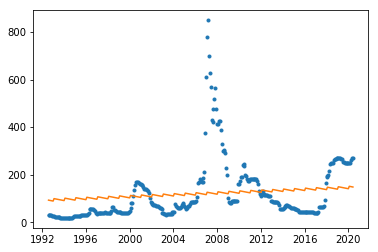

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(ruth_sales['Date'],ruth_sales['Price in $'],'.',
        ruth_sales['Date'],pricePerMonth_predictionModel.predict(ruth_sales),'-')

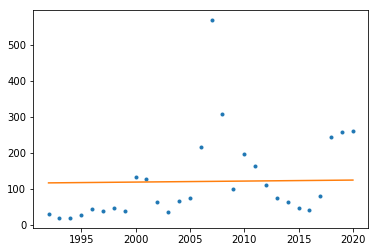

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(year_avgPrice['Year'],year_avgPrice['avgPrice'],'.',
        year_avgPrice['Year'],pricePerYear_predictionModel.predict(year_avgPrice),'-')

# Take the date input to predict for it

In [43]:
Date = raw_input("Enter the date in the foramt of YYYY-MM-DD example:2020-01-30\n")

Enter the date in the foramt of YYYY-MM-DD example:2020-01-30
2000-01-30


In [44]:
Date = datetime.datetime.strptime(Date, '%Y-%m-%d')

In [45]:
yearPrice = pricePerYear_predictionModel.predict({'Year':Date.year})[0]

In [46]:
monthPrice = pricePerMonth_predictionModel.predict({'Year':Date.year,'Month':Date.month})[0]

## Calculate the final predicted price based on the actual data for every month in the year (More weight) and for the average price for the year (less weight)

In [47]:
finalPredictedPrice = ( (1*yearPrice)+(2*monthPrice) ) / 3

In [48]:
print (finalPredictedPrice)

114.903964435
